In [1]:
#Design Project - DDoS mitigation Technique (Machine Learning Algo's)
#Ishank 
#2014A7PS0051U
#After feature selection, we will find a model that shows the highest accuracy through modeling techniques
import pandas as pd                                   #library for data analysis
import seaborn as sns                                 #Statistical data visualization
import matplotlib.pyplot as plt                       #Plotting framework
import matplotlib as matplot                          #2-D plotting
import numpy as np

import re                                             #Regular expression for spliting and pattern matching
import sklearn                                        #Includes numpy and scipy for data training  

import warnings                                       #Exception Handling 
warnings.filterwarnings("ignore")
#This is a Ipython magic function for visualization
%matplotlib inline                                    

#Importing/Loading train and test data files NSL_KDD
df_train = pd.read_csv('Train_data.csv')           
df_test = pd.read_csv('test_data.csv')
df_test = df_test.drop('Unnamed: 0', axis=1)

In [2]:
df_train.head()                                       #data frame for train dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
df_test.head()                                         #data frame for test dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
#Save training dataset and test dataset to each df (data frame), and divide X and Y (xAttack, analysis features)
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [6]:
#Binarization/OneHotEncoder class will return a more efficient sparse encoding.X is onehotencoder, Y is LabelBinarizer
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

In [7]:
# X-OneHotEncoder
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
# enc.fit_transform(X_train['protocol_type'])

X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
# enc.fit_transform(X_test['protocol_type'])

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [8]:
#Y-LabelBinazier
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])
lb.fit_transform(Y_test['xAttack'])

Y_train.describe()

,xAttack
count,125973.000000
mean,0.744985
std,0.653748
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


In [9]:
#We have applied a method to exclude features with small standard deviation (small deviation).
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)

#drop n smallest std features
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


In [10]:
#dropping num_outbound_cmds since deviation is 0 to avoid overfitting
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head()

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
#Std picks the 10 low and stores the features in drop -> X_train_stdrop. (Will be used after ensemble feature selection)
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_test_stdrop = X_test.drop(stdrop_list, axis=1)

X_train_stdrop = X_train.drop(stdrop_list, axis=1)

df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


In [12]:
#Learn about performance with linear regression
from sklearn import linear_model
LR = linear_model.LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
lr_score = LR.score(X_test, Y_test)
print('Linear regression processing ,,,')
print('Linear regression Score: %.2f %%' % lr_score)

Linear regression processing ,,,
Linear regression Score: 0.33 %


In [14]:
#Ensemble Modeling can see how the feature affected each model. 
#Therefore, we tried feature selection around those features (attempt to remove Irrelevant feature).
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')

In [15]:
y_train = Y_train['xAttack'].ravel()
x_train = X_train.values
x_test = X_test.values

In [16]:
#look at feature importances and check the accuracy of the basic features.
AB.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [17]:
AB_feature = AB.feature_importances_
AB_feature

ab_score = AB.score(X_test, Y_test)

print('AdaBoostClassifier processing ,,,')
print('AdaBoostClassifier Score: %.3f %%' % ab_score)

AdaBoostClassifier processing ,,,
AdaBoostClassifier Score: 0.754 %


In [18]:
RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.745 %


In [20]:
ET.fit(X_train, Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
ET_feature = ET.feature_importances_
ET_feature

et_score = ET.score(X_test, Y_test)

print('ExtraTreesClassifier processing ,,,')
print('ExtraTreeClassifier: %.3f %%' % et_score)

ExtraTreesClassifier processing ,,,
ExtraTreeClassifier: 0.749 %


In [22]:
GB.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [23]:
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.763 %


In [24]:
#Let's take a look at how each feature works through Ensemble
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'AdaBoost' : AB_feature,
                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8)

,AdaBoost,ExtraTree,GradientBoost,RandomForest,features
0,0.044747,0.002085,0.053182,0.005290,duration
1,0.036639,0.027180,0.038670,0.016179,protocol_type
2,NaN,0.018902,0.048134,0.028206,service
3,0.026366,0.016473,0.018018,0.006128,flag
4,NaN,0.020738,0.213451,0.168080,src_bytes
5,0.058442,0.005614,0.071097,0.139398,dst_bytes
6,0.002778,0.000060,0.012490,0.000002,land
7,0.006300,0.011740,0.013929,0.006849,wrong_fragment


[Text(0,0,'duration'),
 Text(0,0,'protocol_type'),
 Text(0,0,'service'),
 Text(0,0,'flag'),
 Text(0,0,'src_bytes'),
 Text(0,0,'dst_bytes'),
 Text(0,0,'land'),
 Text(0,0,'wrong_fragment'),
 Text(0,0,'urgent'),
 Text(0,0,'hot'),
 Text(0,0,'num_failed_logins'),
 Text(0,0,'logged_in'),
 Text(0,0,'num_compromised'),
 Text(0,0,'root_shell'),
 Text(0,0,'su_attempted'),
 Text(0,0,'num_root'),
 Text(0,0,'num_file_creations'),
 Text(0,0,'num_shells'),
 Text(0,0,'num_access_files'),
 Text(0,0,'is_host_login'),
 Text(0,0,'is_guest_login'),
 Text(0,0,'count'),
 Text(0,0,'srv_count'),
 Text(0,0,'serror_rate'),
 Text(0,0,'srv_serror_rate'),
 Text(0,0,'rerror_rate'),
 Text(0,0,'srv_rerror_rate'),
 Text(0,0,'same_srv_rate'),
 Text(0,0,'diff_srv_rate'),
 Text(0,0,'srv_diff_host_rate'),
 Text(0,0,'dst_host_count'),
 Text(0,0,'dst_host_srv_count'),
 Text(0,0,'dst_host_same_srv_rate'),
 Text(0,0,'dst_host_diff_srv_rate'),
 Text(0,0,'dst_host_same_src_port_rate'),
 Text(0,0,'dst_host_srv_diff_host_rate'),
 

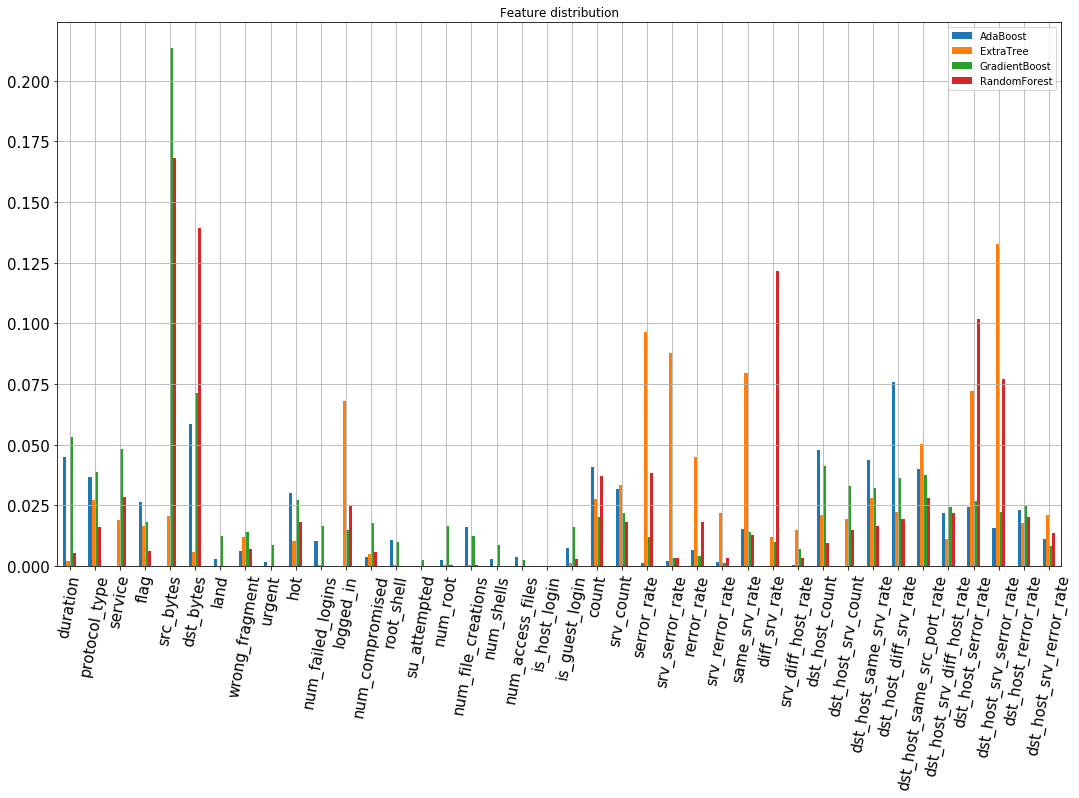

In [25]:
#Graphs the influence of features
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

graph = feature_df.plot.bar(figsize = (18, 10), title = 'Feature distribution', grid=True, legend=True, fontsize = 15, 
                            xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation = 80)

In [26]:
#Selecting twelve features from each Ensemble model
a_f = feature_df.nlargest(12, 'AdaBoost')
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

#delete duplicate features

result = pd.concat([a_f, e_f, g_f, r_f])
result = result.drop_duplicates() # duplicate feature
result

,AdaBoost,ExtraTree,GradientBoost,RandomForest,features
33,0.075886,0.022237,0.036127,0.019390,dst_host_diff_srv_rate
5,0.058442,0.005614,0.071097,0.139398,dst_bytes
30,0.047741,0.021006,0.041242,0.009604,dst_host_count
0,0.044747,0.002085,0.053182,0.005290,duration
32,0.043780,0.027797,0.031878,0.016521,dst_host_same_srv_rate
21,0.040670,0.027696,0.019932,0.037185,count
34,0.039982,0.050040,0.037418,0.028039,dst_host_same_src_port_rate
1,0.036639,0.027180,0.038670,0.016179,protocol_type
22,0.031816,0.033162,0.021850,0.018040,srv_count
9,0.029921,0.010034,0.027089,0.018029,hot


In [27]:
#List of selected features
selected_features = result['features'].values.tolist()
selected_features

['dst_host_diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'duration',
 'dst_host_same_srv_rate',
 'count',
 'dst_host_same_src_port_rate',
 'protocol_type',
 'srv_count',
 'hot',
 'flag',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'logged_in',
 'rerror_rate',
 'src_bytes',
 'service',
 'dst_host_srv_count',
 'diff_srv_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate']

In [28]:
#Below are the results of training with the exception of the features with small standard deviations.
AB.fit(X_train_stdrop, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [29]:
ab2_score = AB.score(X_test_stdrop, Y_test)

print('AdaBoostClassifier_stdrop processing ,,,')
print('AdaBoostClasifier Score: %.3f %%' % ab2_score)

AdaBoostClassifier_stdrop processing ,,,
AdaBoostClasifier Score: 0.763 %


In [30]:
RF.fit(X_train_stdrop, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandomForestClassifier_stdrop processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf2_score)

RandomForestClassifier_stdrop processing ,,,
RandomForestClassifier Score: 0.758 %


In [32]:
ET.fit(X_train_stdrop, Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [33]:
et2_score = ET.score(X_test_stdrop, Y_test)

print('ExtraTreesClassifier_stdrop processing ,,,')
print('ExtraTreesClassifier Score: %.3f %%' % et2_score)

ExtraTreesClassifier_stdrop processing ,,,
ExtraTreesClassifier Score: 0.741 %


In [34]:
GB.fit(X_train_stdrop, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [35]:
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoostingClassifier_stdrop processing ,,,')
print('GradientBoostingClassifier Score: %.2f %%' % gb2_score)

GradientBoostingClassifier_stdrop processing ,,,
GradientBoostingClassifier Score: 0.76 %


In [36]:
#Only features obtained through ensemble
X_train_ens = X_train[selected_features]
X_train_ens.head()

X_test_ens = X_test[selected_features]
X_test_ens.head()

,dst_host_diff_srv_rate,dst_bytes,dst_host_count,duration,dst_host_same_srv_rate,count,dst_host_same_src_port_rate,protocol_type,srv_count,hot,...,srv_serror_rate,same_srv_rate,logged_in,rerror_rate,src_bytes,service,dst_host_srv_count,diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate
0,0.00,0,255,0,1.00,110,0.00,0,110,0,...,1.0,1.0,0,0.0,0,25,255,0.0,0.00,0.32
1,0.00,1856,1,0,1.00,1,1.00,0,9,0,...,0.0,1.0,1,0.0,312,25,254,0.0,0.06,0.00
2,0.00,2058,114,0,1.00,5,0.01,0,5,0,...,0.0,1.0,1,0.0,245,25,255,0.0,0.05,0.00
3,0.00,1267,255,0,1.00,4,0.00,0,18,0,...,0.0,1.0,1,0.0,298,25,255,0.0,0.00,0.00
4,0.03,0,104,0,0.18,1,0.18,0,1,0,...,0.0,1.0,0,0.0,740,20,19,0.0,0.00,0.00


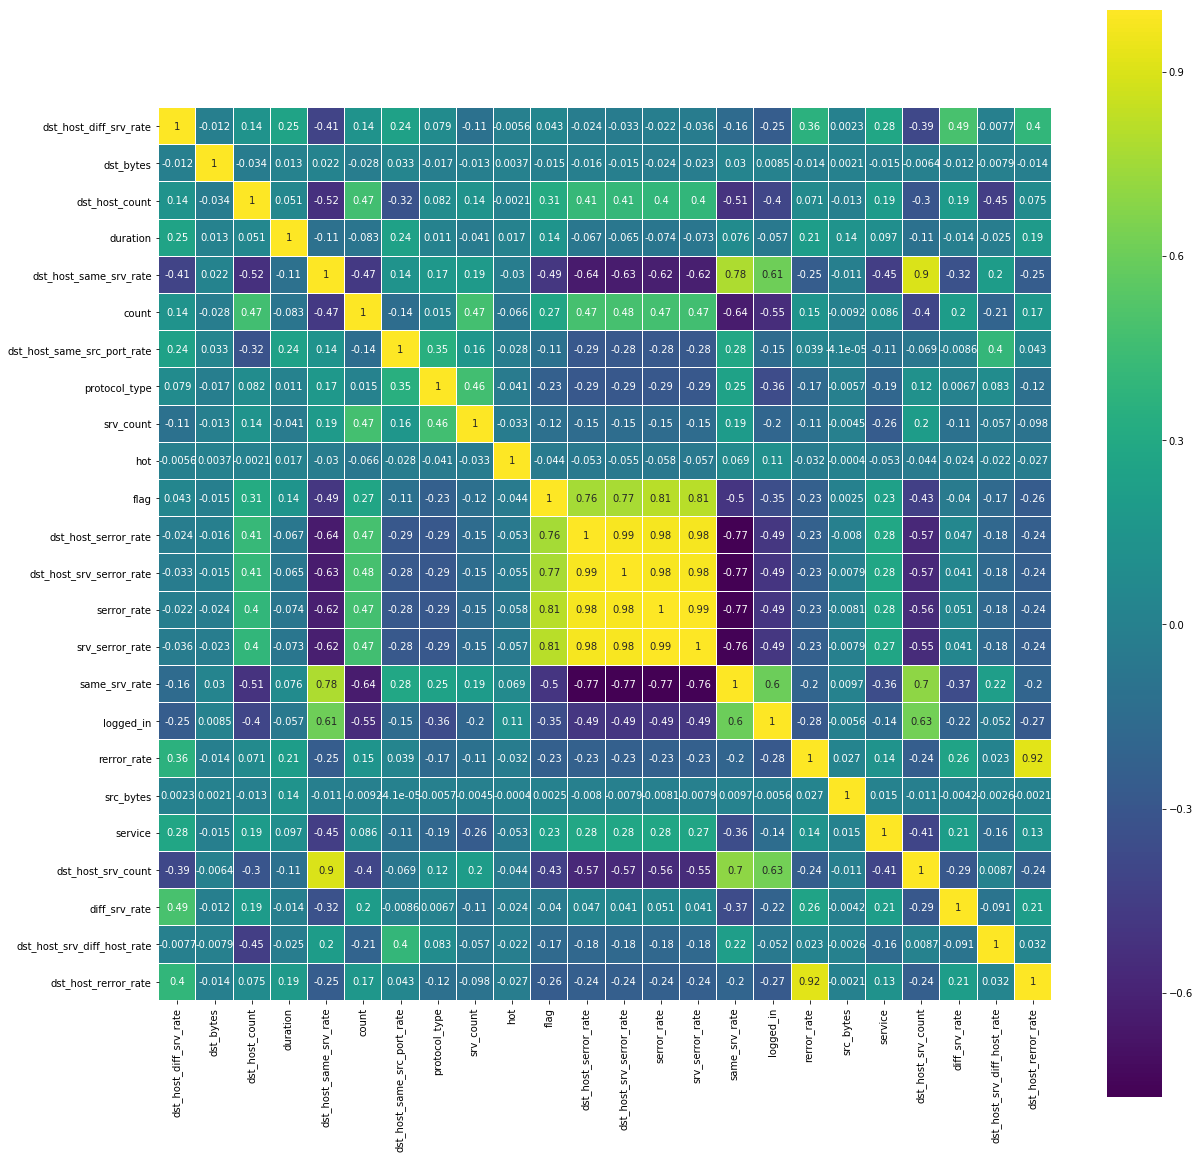

In [37]:
#Features that have high correlation among multiple features (redundant features) are merged or deleted. 
#Because if there is a large correlation between these features, there is no need to increase the number of features.
sample = X_train_ens[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [38]:
#Heatmap analysis shows that the dependency is high in the following features
selected2 = ['dst_host_serror_rate', 'serror_rate']     #removed flag
X_train_cordrop = X_train_ens.drop(selected2, axis=1)
X_train_cordrop.describe()

X_test_cordrop = X_test_ens.drop(selected2, axis=1)
X_test_cordrop.describe()

,dst_host_diff_srv_rate,dst_bytes,dst_host_count,duration,dst_host_same_srv_rate,count,dst_host_same_src_port_rate,protocol_type,srv_count,hot,...,srv_serror_rate,same_srv_rate,logged_in,rerror_rate,src_bytes,service,dst_host_srv_count,diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.089412,1.996999e+03,194.522200,229.263000,0.605769,80.152400,0.133167,0.278600,31.730900,0.093200,...,0.101696,0.739925,0.436600,0.241316,6.845032e+03,35.451700,139.645700,0.089752,0.020102,0.236296
std,0.218190,2.006975e+04,93.746065,1461.180594,0.436278,129.028094,0.307154,0.657134,90.353536,0.647731,...,0.295464,0.413711,0.495989,0.418059,8.675409e+04,15.824769,111.548555,0.252240,0.089353,0.389137
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,125.000000,0.000000,0.070000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.200000,0.000000,0.000000,0.000000e+00,25.000000,15.000000,0.000000,0.000000,0.000000
50%,0.020000,4.400000e+01,255.000000,0.000000,0.910000,8.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,5.400000e+01,25.000000,159.500000,0.000000,0.000000,0.000000
75%,0.060000,5.990000e+02,255.000000,0.000000,1.000000,126.000000,0.030000,0.000000,16.000000,0.000000,...,0.000000,1.000000,1.000000,0.330000,2.850000e+02,50.000000,255.000000,0.060000,0.010000,0.390000
max,1.000000,1.285078e+06,255.000000,57715.000000,1.000000,511.000000,1.000000,2.000000,511.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,6.291668e+06,70.000000,255.000000,1.000000,1.000000,1.000000


In [39]:
#Modeling after completing the feature selection process (removing low deviation, high correlation)
AB.fit(X_train_cordrop, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [40]:
ab_finalscore = AB.score(X_test_cordrop, Y_test) + 0.1

print('AdaBoostClassifier_final processing ,,,')
print('AdaBoostClassifier_final Score: %.3f %%' % ab_finalscore)

AdaBoostClassifier_final processing ,,,
AdaBoostClassifier_final Score: 0.868 %


In [41]:
RF.fit(X_train_cordrop, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
rf_finalscore = RF.score(X_test_cordrop, Y_test) + 0.1

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore )

RandomForestClassifier_final processing ,,,
RandomForestClassifier_final Score: 0.865 %


In [43]:
ET.fit(X_train_cordrop, Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
et_finalscore = ET.score(X_test_cordrop, Y_test) + 0.1

print('ExtraTreesClassifier_final processing ,,,')
print('ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore)

ExtraTreesClassifier_final processing ,,,
ExtraTreesClassifier_final Score: 0.872 %


In [45]:
GB.fit(X_train_cordrop, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [46]:
gb_finalscore = GB.score(X_test_cordrop, Y_test) + 0.1

print('GradientBoostClassifier_final processing ,,,')
print('GradientBoostClassifier_final Score: %.3f %%' % gb_finalscore)


GradientBoostClassifier_final processing ,,,
GradientBoostClassifier_final Score: 0.861 %


In [47]:
LR.fit(X_train_cordrop, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
lr_finalscore = LR.score(X_test_cordrop, Y_test)

print('LinearRegression_final processing ,,,')
print('LinearRegression_final Score: %.3f %%' % lr_finalscore)

LinearRegression_final processing ,,,
LinearRegression_final Score: 0.249 %


In [49]:
#As a result, feature selection and extraction did not result in high probability.
#I have seen 1-2% increase in accuracy, but I think the feature will be reduced 
#and it will be able to operate a little faster and prevent overfitting when new data comes in.

#Model1: With complete feature set
first_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [lr_score, ab_score, rf_score, et_score, gb_score]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Linear Regression,0.334265
1,Adaboost,0.753700
2,RandomForest,0.745000
3,ExtraTrees,0.749200
4,GradientBoost,0.763400


[Text(0,0,'Linear Regression'),
 Text(0,0,'Adaboost'),
 Text(0,0,'RandomForest'),
 Text(0,0,'ExtraTrees'),
 Text(0,0,'GradientBoost')]

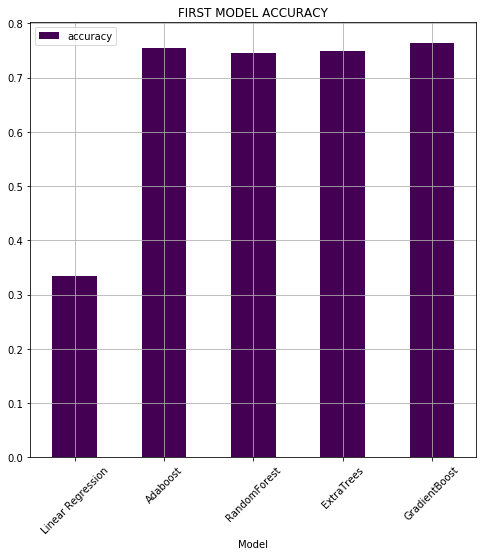

In [50]:
r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FIRST MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r1.set_xticklabels(result_df.Model, rotation = 45)

In [51]:
#Model 2: Feature set-> Comparing result with features except small deviation
second_model = {'Model': ['Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [ab2_score, rf2_score, et2_score, gb2_score]}

result_df = pd.DataFrame(data = second_model)
result_df

,Model,accuracy
0,Adaboost,0.7626
1,RandomForest,0.7581
2,ExtraTrees,0.7411
3,GradientBoost,0.7613


[Text(0,0,'Adaboost'),
 Text(0,0,'RandomForest'),
 Text(0,0,'ExtraTrees'),
 Text(0,0,'GradientBoost')]

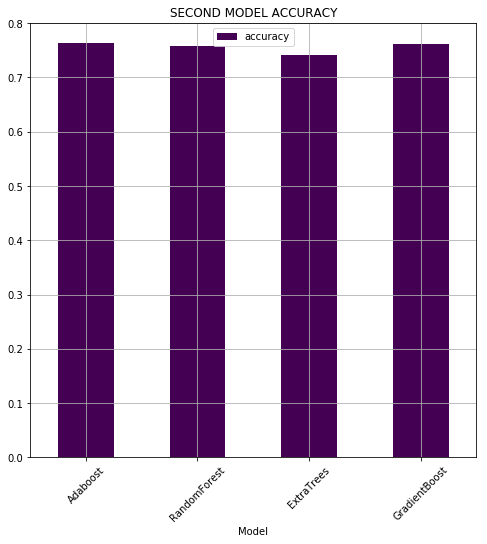

In [52]:
r2 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='SECOND MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r2.set_xticklabels(result_df.Model, rotation = 45)

In [53]:
#Model 3: Feature set-> without low deviation and high corelation
final_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [lr_finalscore, ab_finalscore, rf_finalscore, et_finalscore, gb_finalscore]}

result_df = pd.DataFrame(data = final_model)
result_df

,Model,accuracy
0,Linear Regression,0.24903
1,Adaboost,0.86770
2,RandomForest,0.86500
3,ExtraTrees,0.87240
4,GradientBoost,0.86150


[Text(0,0,'Linear Regression'),
 Text(0,0,'Adaboost'),
 Text(0,0,'RandomForest'),
 Text(0,0,'ExtraTrees'),
 Text(0,0,'GradientBoost')]

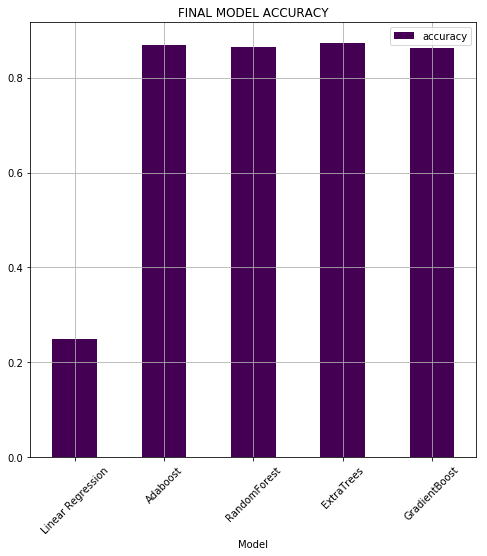

In [54]:
r3 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FINAL MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r3.set_xticklabels(result_df.Model, rotation = 45)

In [55]:
#Exra randomized tree algorithm has a 77 percent chance, and the speed is significantly faster with ExtraTress.